In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

file = pd.read_csv("Data/UK_cars/toyota.csv")

file.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [2]:
file["model"] = [x.strip() for x in file.model]

In [3]:
mask = (file["model"] == "Aygo")|(file["model"] == "Yaris")
df2 = file.loc[mask,:]
df2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


In [4]:
df2.groupby("model").agg({"price":"mean"})

,price
model,
Aygo,7905.414584
Yaris,10553.083883


In [5]:
df2.groupby("model").agg({"price":"median"})

,price
model,
Aygo,7895.0
Yaris,10652.5


In [6]:
df2.groupby("model").agg({"price":"var"})

,price
model,
Aygo,2.764884e+06
Yaris,6.608439e+06


In [7]:
df2.groupby("model").agg({"price":"std"})

,price
model,
Aygo,1662.794122
Yaris,2570.688483


<AxesSubplot:xlabel='price', ylabel='Count'>

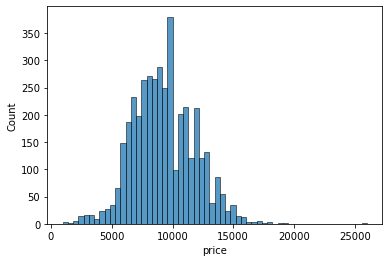

In [8]:
sns.histplot(data=df2, x="price")

<AxesSubplot:title={'center':'price'}, xlabel='model'>

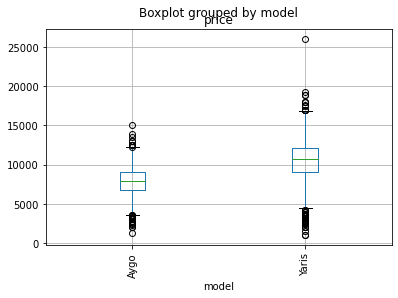

In [9]:
df2.boxplot(by ='model', column =["price"], grid = True, rot = 90)

In [10]:
maska = (df2["price"] < 25000) 
df3 = df2.loc[maska,:]
df3

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


<AxesSubplot:title={'center':'price'}, xlabel='model'>

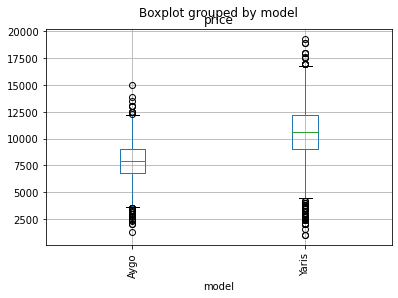

In [11]:
df3.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

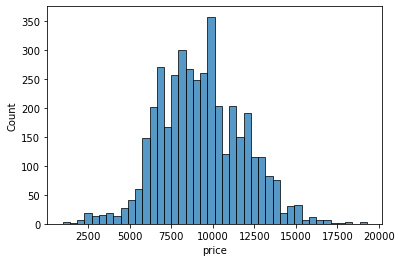

In [12]:
sns.histplot(data=df3, x="price")

In [13]:
df3.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5


In [14]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats



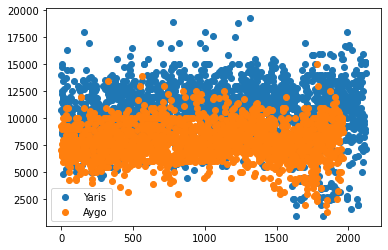

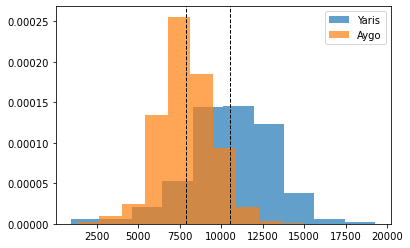

In [15]:
population1a = df3.loc[df3["model"]=="Yaris",:]
population2a= df3.loc[df3["model"]=="Aygo",:]
population1b = population1a["price"]
population2b = population2a["price"]

plt.scatter(range(len(population1b)), population1b, label="Yaris")
plt.scatter(range(len(population2b)), population2b, label="Aygo")
plt.legend()
plt.show()

plt.hist(population1b, 10, density=True, alpha=0.7, label="Yaris")
plt.hist(population2b, 10, density=True, alpha=0.7, label="Aygo")
plt.axvline(population1b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()


In [16]:
np.mean(population1b)

10545.803394625176

In [17]:
np.mean(population2b)

7905.414584395717

In [18]:
np.var(population1b)

6495961.578036574

In [19]:
np.var(population2b)

2763474.3559117196

In [20]:
stats.ttest_ind(population1b, population2b, equal_var=False)

Ttest_indResult(statistic=39.474492802499356, pvalue=1.8625242244512783e-284)

In [21]:
file2 = pd.read_csv("Data/UK_cars/ford.csv")

file2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [22]:
file2["model"] = [x.strip() for x in file2.model]

In [23]:
maskb = (file2["model"] == "Fiesta")|(file2["model"] == "Focus")
df2b = file2.loc[maskb,:]
df2b

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [24]:
df2b.groupby("model").agg({"price":"mean"})

,price
model,
Fiesta,10196.298002
Focus,13185.882956


<AxesSubplot:xlabel='price', ylabel='Count'>

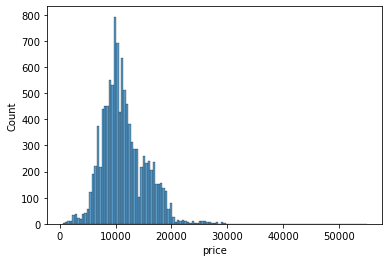

In [25]:
sns.histplot(data=df2b, x="price")

<AxesSubplot:title={'center':'price'}, xlabel='model'>

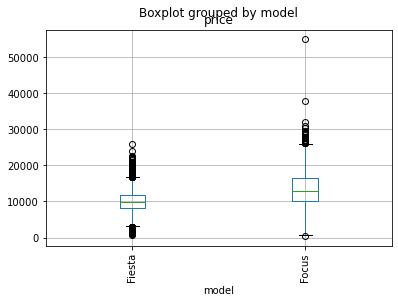

In [26]:
df2b.boxplot(by ='model', column =["price"], grid = True, rot = 90)

In [27]:
maske = (df2b["price"] < 35000) 
df3b = df2b.loc[maske,:]
df3b

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


<AxesSubplot:title={'center':'price'}, xlabel='model'>

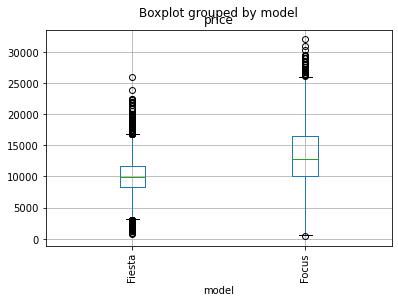

In [28]:
df3b.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

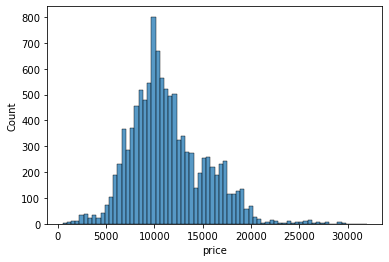

In [29]:
sns.histplot(data=df3b, x="price")

In [30]:
maskh = (((df3b["model"] == "Fiesta") & (df3b["price"] < 20000)) | ((df3b["model"] == "Focus") & (df3b["price"] < 27000)))
df3c = df3b.loc[maskh,:]
df3c

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


<AxesSubplot:title={'center':'price'}, xlabel='model'>

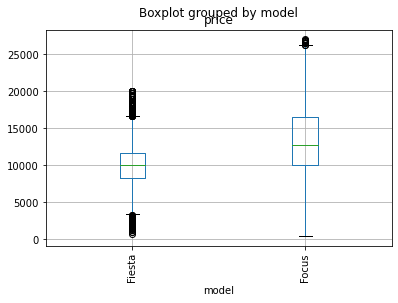

In [31]:
df3c.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

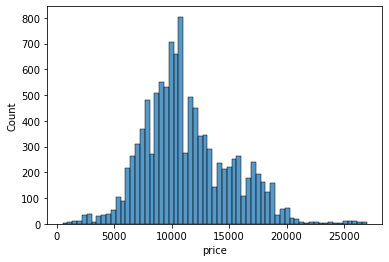

In [32]:
sns.histplot(data=df3c, x="price")

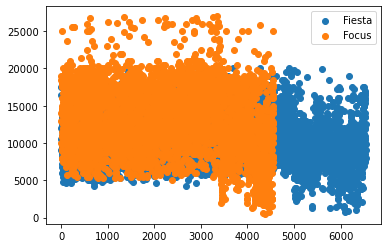

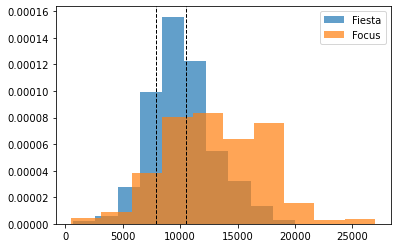

In [33]:
population1c =  df3c.loc[df3c["model"]=="Fiesta",:]
population2c= df3c.loc[df3c["model"]=="Focus",:]
population1d = population1c["price"]
population2d = population2c["price"]

plt.scatter(range(len(population1d)), population1d, label="Fiesta")
plt.scatter(range(len(population2d)), population2d, label="Focus")
plt.legend()
plt.show()

plt.hist(population1d, 10, density=True, alpha=0.7, label="Fiesta")
plt.hist(population2d, 10, density=True, alpha=0.7, label="Focus")
plt.axvline(population1b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()


In [34]:
np.mean(population1d)

10165.540366972476

In [35]:
np.mean(population2d)

13083.716885964912

In [36]:
np.var(population1d)

7997103.740113615

In [37]:
np.var(population2d)

18576801.28234644

In [38]:
stats.ttest_ind(population1d, population2d, equal_var=False)

Ttest_indResult(statistic=-40.09278905193241, pvalue=0.0)

In [41]:
Toyota = df3
Ford = df3c
list_of_dataframes = [Toyota, Ford]

In [43]:
df_cars = pd.concat(list_of_dataframes, ignore_index=True)
df_cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
1,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
2,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
3,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
4,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
15177,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
15178,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
15179,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
15180,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


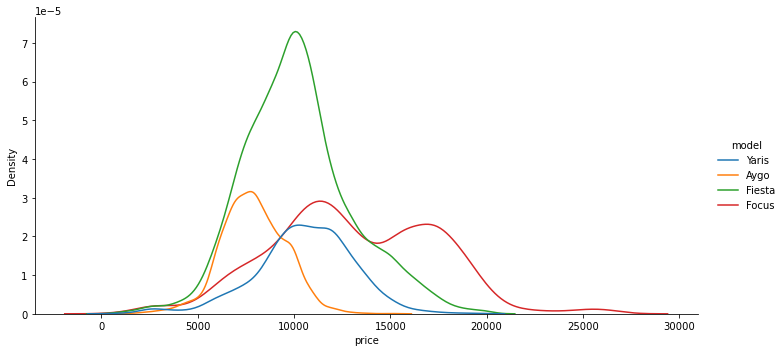

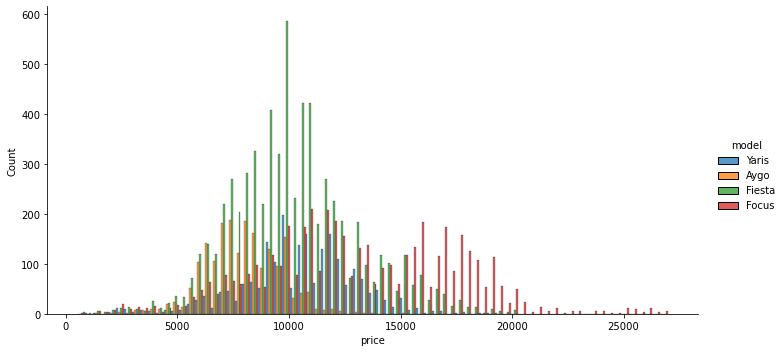

In [44]:
#https://towardsdatascience.com/anova-test-with-python-cfbf4013328b
# import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
sns.displot(df_cars,x='price',hue='model',kind='kde',height=5,aspect=2)
sns.displot(df_cars,x='price',hue='model',multiple='dodge',height=5,aspect=2)

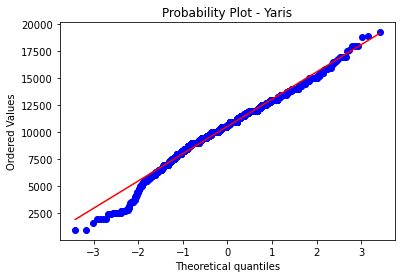

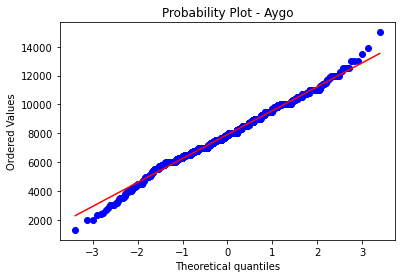

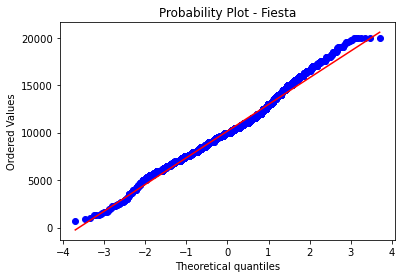

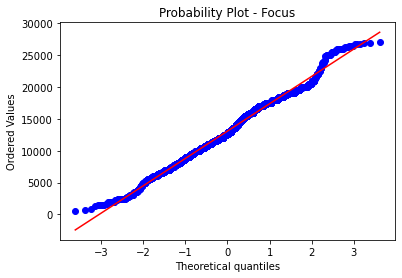

In [54]:
models = df_cars['model'].unique()
for model in models:
    stats.probplot(df_cars[df_cars['model'] == model]['price'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  model)
    plt.show()


In [55]:
ratio = df_cars.groupby('model').std().max() / df_cars.groupby('model').std().min()
ratio

year           1.286459
price          2.592356
mileage        1.457784
tax            1.104532
mpg            2.274465
engineSize    10.014912
dtype: float64

In [57]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df_cars['price'].mean()
SSTR = df_cars.groupby('model').count() * (df_cars.groupby('model').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['price'].sum()

# calculate SSE and update anova table
SSE = (df_cars.groupby('model').count() - 1) * df_cars.groupby('model').std()**2
anova_table['SS']['Within Groups'] = SSE['price'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['price'].sum() + SSE['price'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df_cars['model'].nunique() - 1
anova_table['df']['Within Groups'] = df_cars.shape[0] - df_cars['model'].nunique()
anova_table['df']['Total'] =df_cars.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,42982035287.977989,3,14327345095.992662,1392.117656,0.0,3.116992
Within Groups,156208380026.801056,15178,10291763.079905,,,
Total,199190415314.779053,15181,13121033.878847,,,


In [59]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 1392.1176561056866  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.


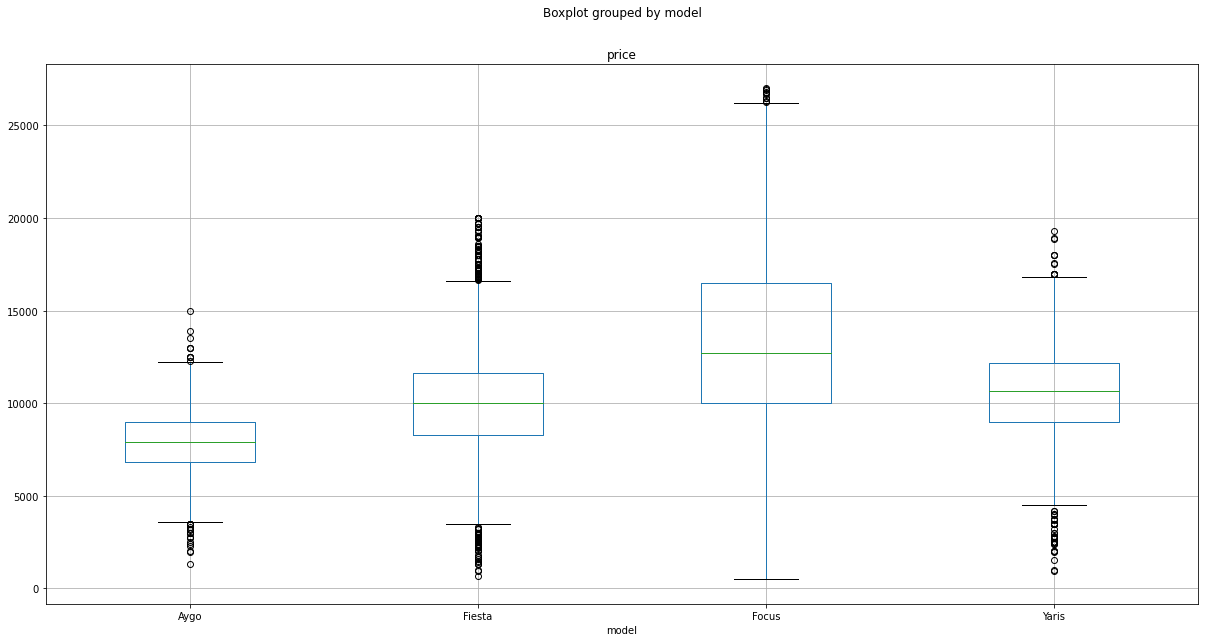

In [61]:
df_cars.boxplot("price", by="model", figsize=(20, 10))
plt.show()

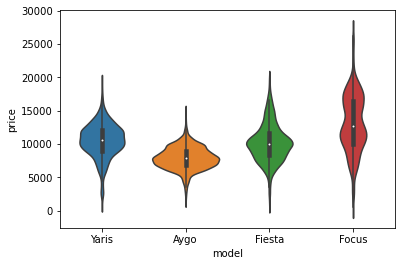

In [62]:
sns.violinplot(data=df_cars, x="model", y="price")
plt.show()

In [63]:
df_cars.groupby("model").agg({"price": ["mean", "std", "var", "count"]}, axis=1)

price                                 
                mean          std           var count
model                                                
Aygo     7905.414584  1662.794122  2.764884e+06  1961
Fiesta  10165.540367  2828.131313  7.998327e+06  6540
Focus   13083.716886  4310.554029  1.858088e+07  4560
Yaris   10545.803395  2549.318676  6.499026e+06  2121

In [64]:
group1 = df_cars[df_cars["model"] == "Aygo"]["price"]
group2 = df_cars[df_cars["model"] == "Fiesta"]["price"]
group3 = df_cars[df_cars["model"] == "Focus"]["price"]
group4 = df_cars[df_cars["model"] == "Yaris"]["price"]

In [65]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=1392.1176561056843, pvalue=0.0)

In [66]:
print(stats.ttest_ind(group1, group2, equal_var=False))
print(stats.ttest_ind(group1, group3, equal_var=True))
print(stats.ttest_ind(group1, group4, equal_var=False))

print(stats.ttest_ind(group2, group3, equal_var=False))
print(stats.ttest_ind(group2, group4, equal_var=True))

print(stats.ttest_ind(group3, group4, equal_var=False))




Ttest_indResult(statistic=-44.046727046413544, pvalue=0.0)
Ttest_indResult(statistic=-51.57138560900871, pvalue=0.0)
Ttest_indResult(statistic=-39.474492802499356, pvalue=1.8625242244512783e-284)
Ttest_indResult(statistic=-40.09278905193241, pvalue=0.0)
Ttest_indResult(statistic=-5.508856413435533, pvalue=3.715226414598675e-08)
Ttest_indResult(statistic=30.037347629841285, pvalue=2.113110310686985e-185)
